# Introduction to Regression

Regression is trying to fit a function that will represent the relationship between two or more variables. In this example we will be using regression between two variables. 

Consider the following chart:

![Chart 1](chart1.png)

This shows the age of a child against the average height they are supposed to be.


## Intercept and Slope

When performing regression we need to features:
- the intercept ($c$)- the value at $y$ when $x$ is zero
- the slope ($m$) - how much $y$ should change when $x$ increases by 1 point

So, we have a function $y = mx + c$

In this case, this function can be then used to predict the height based on the age.

Doing it manually, we can find $m = \frac{y2 - y1}{x2 - x1}$

So, in this case $m = \frac{1.5-1.2}{9-6} = 0.1$

We can find $c = y - mx$

So, in this case $c = 1.2 - (0.1*6) = 0.6$

This will result in $height = 0.1*age + 0.6$

Let's add a few extra points using this function.

| Age | Height | 
| --- | --- |
| 4 | 1.0 |
| 5 | 1.1 |
| 6 | 1.2 |
| 7 | 1.3 |
| 8 | 1.4 |
| 9 | 1.5 |
| 10 | 1.6 |
| 11 | 1.7 |

<br/>

![Chart 2](chart2.png)

Note: Although this might seem accurate, one must be very careful about data. For instance, if we enter the age 65, we end up with a height of $ = 0.1*65 + 0.6 = 7.1 $! Obviously at a point in time a human stops getting tall, and eventually will get shorter. But since our data is limited to this little time window, this cannot be perceived by the model.

## Errors

Let us say that we have an addition two observations, a child aged 6, 1.4m tall, and another child aged 7, 1.2m tall.

![Chart 3](chart3.png)

We can find the error rate by measuring the distance of error from the regression line, so:

| Observation | Regression Value | Difference |
| --- | --- | --- |
| 1.4 | 1.2 | 0.2 |
| 1.2 | 1.3 | -0.1 |

We can find the RMSE (Root Mean Squared Error) - a measure to determine the efficieny of the model by: 
- Squaring all the Values
- Finding their mean
- Square root the mean

Squared Values = $(0.2*0.2) + (-0.1*-0.1) = 0.04 + 0.01 = 0.05$

Find their mean = $ \frac{0.05}{2} = 0.025$

Square root the mean = $ \sqrt{0.025} = 0.158 $

This means the RMSE is 0.158, and if we try to predict the height we can have a different of +/- 0.158m.



# Simple Regression 

For this example we will be using a linear regression to try to fit a model that explains how mpg (miles per gallon) is affected by the weight of the car.

First, let's load the data.

In [1]:
# import libraries
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\ivane\Desktop\ACI-1\data\auto-mpg-simple.csv')
df.head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


## Data Exploration

Let's give a quick look to how data is distributed by using histograms on weight and mpg.

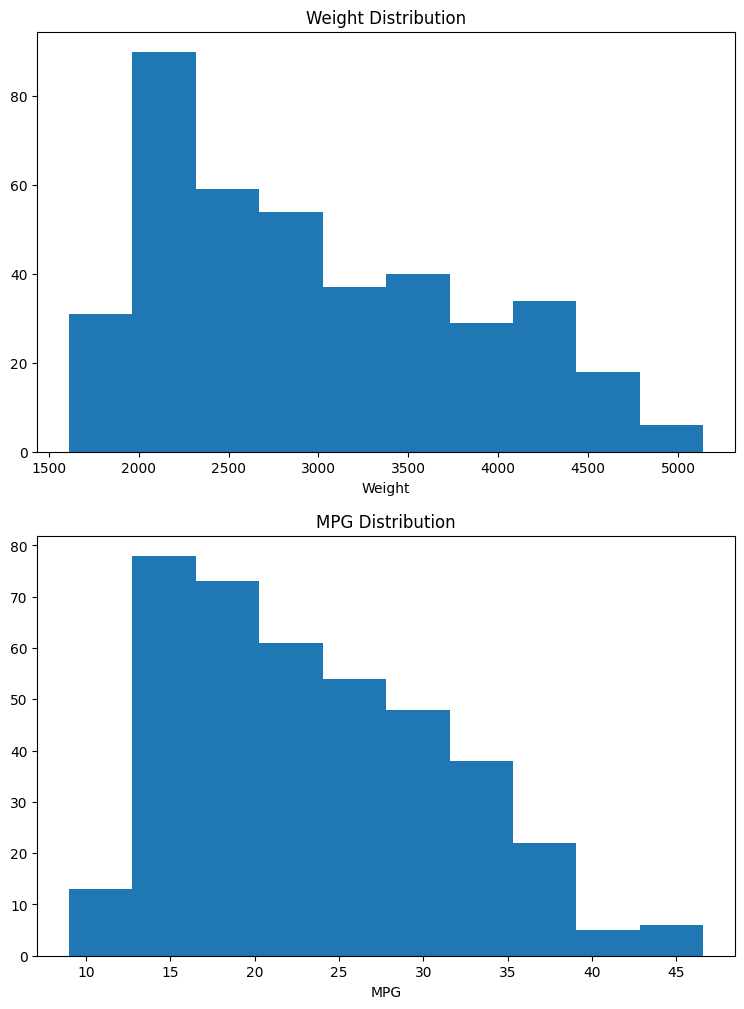

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(9,12))

ax[0].hist(df.weight)
ax[0].set_xlabel('Weight')
ax[0].set_title('Weight Distribution')

ax[1].hist(df.mpg)
ax[1].set_xlabel('MPG')
ax[1].set_title('MPG Distribution')

plt.show()

## Variable Relationship

We can also plot a scatter plot that gives us an idea of any relationship between the two variables. This can be further supplemented by a correlation calculation.

In [3]:
df.corr()

,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


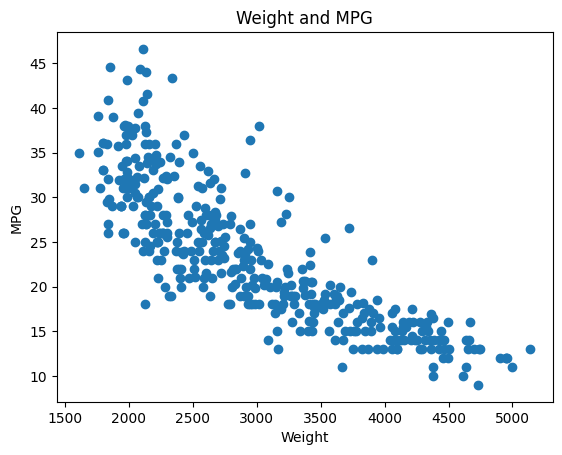

In [4]:
plt.scatter(df.weight, df.mpg)
plt.title('Weight and MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')

plt.show()

As one can observe there seems to be a strong indication that the heavier the car the more fuel it comsumes (hence mpg is less). This is further supported by the correlation score of $-0.832$

## Creating Regression Model

For this we will be using ordinary least squares `ols` from the statsmodel package.

StatsModel information: _[Regression](https://www.statsmodels.org/stable/regression.html)_ and _[OLS](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html)_

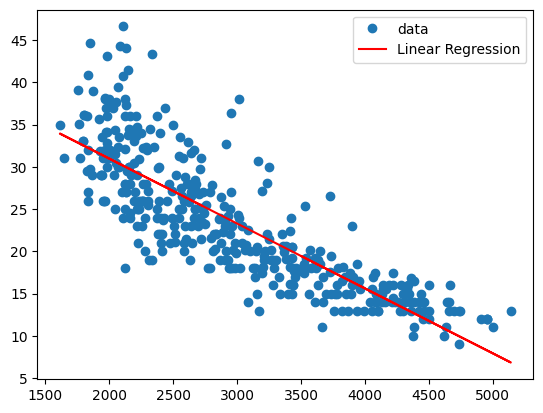

In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# create formula such that 'target ~ predictor'
formula = 'mpg ~ weight'

# create model 
model = smf.ols(formula=formula, data=df).fit()

# plot
plt.plot(df.weight, df.mpg, 'o', label='data')
plt.plot(df.weight, model.fittedvalues, color='red', label = 'Linear Regression')
plt.legend(loc='best')
plt.show()

We can see that the line passes through the centre of the dots and slopes downwards.

## Interpreting the Results

Let's check the model summary.

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.97e-103
Time:                        08:44:43   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With a p-value of 2.97e-103, we reject the null hypothesis and therefore can accept this model. This means that the target variable 'MPG' can be preicted by the weight predictor with a confidence kevek greater than 95% (looking for a p-value lower than 5%)

With an R-squared 

We are focusing only on the following: 
| Measure | Description | Applied |
| --- | --- | --- |
| R-Squared | Tells us how much of the independent variable (mpg) is explained by changes in our dependent variable (weight).| In this case it's $0.692$, this means that 69.2% of our data is covered by this model. |
| Adjusted R-Squared | This is important when there are more dependent variables. This is adjusted takes care of highlighting any additional variables that will not be contributing to the model. | In this case it's the same since we only have 1 variable. | 
| F-Statistic | This shows us that the model overall is well fitted. The higher the number the better. It compares the regression model with all the features against an intercept-only model (assume it's like the average value). | In this case the F value is very high, hence this model is good. |
| Prob (F-Statistic) | This must be taken into consideration with the F-Statistics. If this value is less than 0.05, it means the model is good. | In this case this is very small, so once again it corraborates the F-Statistic.|
| Intercept | This is the intercept of the line, in the function $y = mx + c$ it will be the $c$. | In this case it is $46.32$ |
| coef | This is present for every feature. It is the measurement of how the indepedent variable changes with a 1 point increase of this feature. In the function $y = mx + c$, it will be the $m$. | In this case increasing the weight by 1 unit, the mpg is decreased by $-0.0077$.   |
| P>\|t\| | This is based on the std err and t, the smaller the number the more impact the feature has on the independent variable. Usually, for a feature to be accepted it has to be less than 0.05. | If it is 0.2, it means that Weight has 20% chance of having no effect on the MPG. In this case, since it's 0, it's clearly saying that for sure it has effect on the MPG. | 

For more details on these you can read the following:
_[Link 1](https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a)_, _[Link 2](https://timeseriesreasoning.com/contents/f-test-for-regression-analysis/)_

## Predicting New Values

Once we have the intercept and the slope, we can use them to predict new values.

In [7]:
model.params

Intercept    46.317364
weight       -0.007677
dtype: float64

In [8]:
model.params[0]

C:\Users\ivane\AppData\Local\Temp\ipykernel_16684\629825848.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model.params[0]


46.31736442026564

In [9]:
model.params[1]

C:\Users\ivane\AppData\Local\Temp\ipykernel_16684\157664867.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model.params[1]


-0.0076766100639264635

In [10]:
def estimate_mpg (alpha, beta, weight):
    return alpha + beta * weight

print('Estimates MPG for weight 4000 is: {: .2f}'.format(estimate_mpg(model.params.iloc[0], model.params.iloc[1], 4000)))

Estimates MPG for weight 4000 is:  15.61
